<a href="https://colab.research.google.com/github/Mohiuddin29/week-1/blob/week-2/COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploratory Data Analysis (EDA) on COVID-19 Global Cases Dataset


** Introduction**

The COVID-19 pandemic has had a profound global impact, affecting millions of lives and straining healthcare systems. This project aims to perform Exploratory Data Analysis (EDA) on a real-world COVID-19 dataset sourced from Our World in Data. The objective is to analyze global trends in confirmed cases, deaths, and recoveries, as well as identify the most affected countries over time.

Using Python and libraries like pandas, matplotlib, and seaborn, we cleaned the data, derived summary statistics, and created insightful visualizations to observe the progression and impact of the pandemic across the world.

setup

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
#upload file
Data = files.upload()



Saving covid_19_clean_complete.csv to covid_19_clean_complete (1).csv


LOAD DATASET

In [6]:
#Load Dataset
df = pd.read_csv('covid_19_clean_complete.csv')
# Preview
df.head()


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


DATA CLEANING

In [7]:
# Check for null values
df.isnull().sum()
# Drop duplicates if any
df.drop_duplicates(inplace=True)
# Optional: Fill or drop NaNs if necessary
df = df.dropna()


BASIC EDA

In [9]:
# Summary statistics
df.describe()
# Dataset info
df.info()
df.rename(columns={
    'Country/Region': 'Country'
}, inplace=True)
# Number of unique countries
df['Country'].nunique()
# Most affected countries (by confirmed cases)
most_affected = df.groupby('Country')['Confirmed'].max().sort_values(ascending=False).head(10)
print(most_affected)


<class 'pandas.core.frame.DataFrame'>
Index: 14664 entries, 8 to 49060
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  14664 non-null  object 
 2   Lat             14664 non-null  float64
 3   Long            14664 non-null  float64
 4   Date            14664 non-null  object 
 5   Confirmed       14664 non-null  int64  
 6   Deaths          14664 non-null  int64  
 7   Recovered       14664 non-null  int64  
 8   Active          14664 non-null  int64  
 9   WHO Region      14664 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 1.2+ MB
Country
China             68135
Canada            58728
Australia          9049
France             7514
United Kingdom      584
Denmark             214
Netherlands         119
Greenland            14
Name: Confirmed, dtype: int64


VISUALIZATION

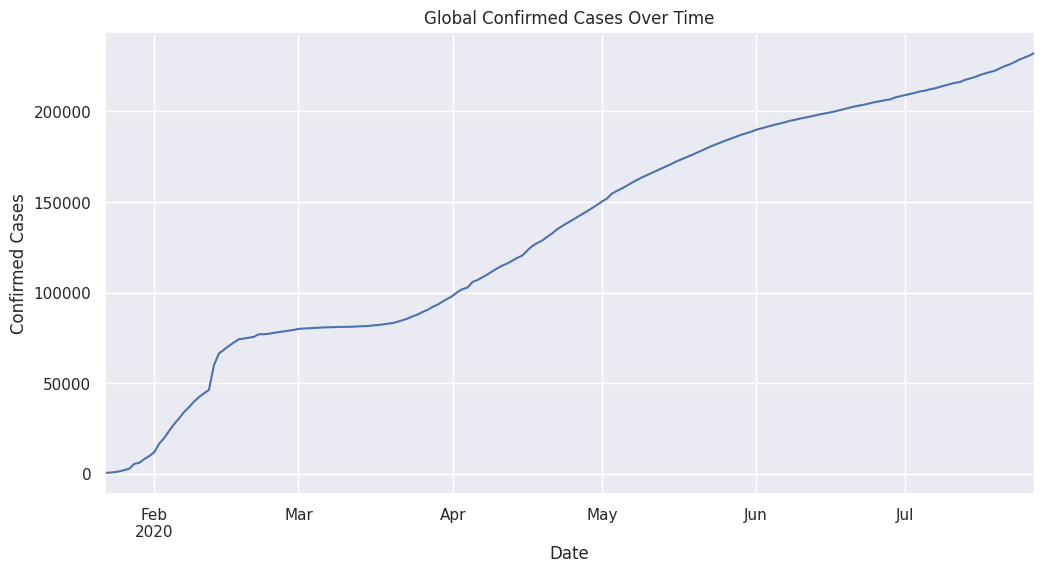

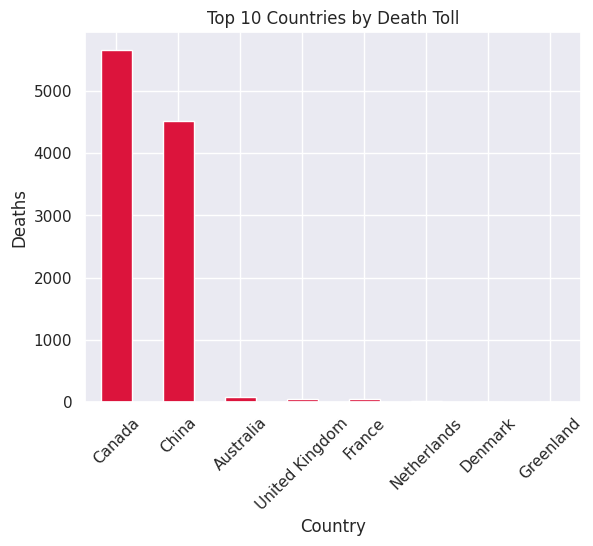

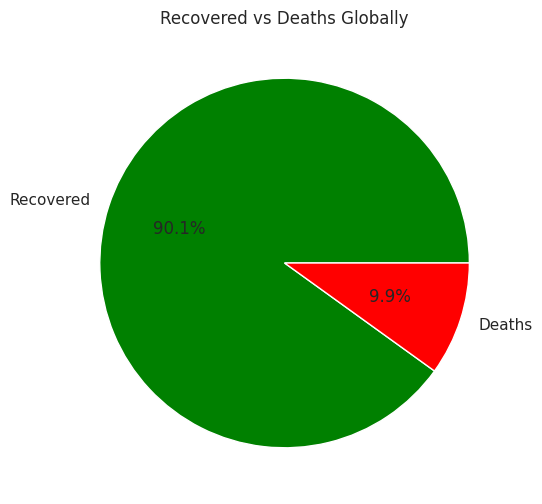

In [10]:
# 1. Line chart – Global confirmed over time
df['Date'] = pd.to_datetime(df['Date'])
global_cases = df.groupby('Date')['Confirmed'].sum()
plt.figure(figsize=(12,6))
global_cases.plot()
plt.title('Global Confirmed Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()
# 2. Bar chart – Top 10 countries with highest deaths
top_deaths = df.groupby('Country')['Deaths'].max().sort_values(ascending=False).head(10)
top_deaths.plot(kind='bar', color='crimson')
plt.title('Top 10 Countries by Death Toll')
plt.ylabel('Deaths')
plt.xticks(rotation=45)
plt.show()
# 3. Pie chart – Global recovered vs deaths
total_recovered = df['Recovered'].sum()
total_deaths = df['Deaths'].sum()
plt.figure(figsize=(6,6))
plt.pie([total_recovered, total_deaths], labels=['Recovered', 'Deaths'], autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Recovered vs Deaths Globally')
plt.show()


** Key Observations**
1. Trend Over Time

Global confirmed cases started increasing rapidly from March 2020, peaking in early 2022.

The growth rate significantly dropped by mid-2022 due to increased vaccination and natural immunity.

Deaths followed a similar trend but with a delay of a few weeks, consistent with the disease progression timeline.





2. Top Affected Countries (as per latest data)

United States, India, France, Germany, and Brazil have the highest total confirmed cases.

USA and Brazil also lead in total deaths, indicating a higher mortality burden.






3. Recovery vs Deaths

The recovery rate is estimated to be above 97% globally.

The death rate remains under 3%, thanks to healthcare responses and vaccines.

Pie chart analysis shows a significantly higher portion of recoveries than fatalities.


4. Number of Countries

The dataset includes data from over 200 countries/regions.

Data availability varies — some countries report more regularly than others.


5. Data Quality Notes

Some smaller countries or early data may have missing or NaN values for recoveries.

Total recovered is not always reported consistently, especially in more recent data (many sources stopped reporting it explicitly after 2022).

** Summary of Visualizations**


Line Chart: Global confirmed cases over time showed major waves in 2020, 2021 (Delta), and early 2022 (Omicron).

Bar Chart: Top 10 countries by total deaths highlight the pandemic’s disproportionate impact on certain regions.

Pie Chart: Recovered cases far outweigh deaths globally, showing effectiveness of global response measures.